<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** The Nodes of a Neural Network. These represent the values after a calculation is made depending on the weights that procede it and then pass the sum of those calculations to the next layer.
- **Input Layer:**The first layer of a nueral network. These represent the values before any weights are caluculated. This layer requires an input dimension.
- **Hidden Layer:**The layers between the input layer and the output layer. there is at least one hidden layer and can be as many as designated by the creator of the network. 
- **Output Layer:**This layer represents the finalized value of the calculations performed after the input layer and by each of the hidden layers. The amount of Neurons here should match the amount of classes in a multiclassification model (softfmax) and as few as one in a binarey classifiaction model(sigmoid)
- **Activation Function:** The function that determines the output of a nueron, such as sigmoid (0-off, 1-on), reLU, leaky reLU, tanf, and softmax.

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

The process of sending input all the way through a neraul network, deciding how bad the resulting predicted answers made by the network are, and then going backwards through and making the adjustments that would make those predictions better, over and over again until we get predictions that are as best as we can possibly get, is called 'back propagation'. 

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

The input is taken into the network, multiplied by the weights as determined by the activation function and sent to each connected neuron in the hiddenlayer. Those neurons sum all of the resulting values, and any bias that is required by the network architecture and pass them to the output layer determined by the activation function with that neuron's associated weights. If there are multiple nerons in the output layer, the highest score wins the prediction. if there is just one, it will result in the output either being 'on', or 'off'.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [ ]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [ ]:
xx.shape, yy.shape, X.shape, y.shape

((50, 50), (50, 50), (300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
model1 = tf.keras.Sequential([Dense(1, activation='sigmoid')])

model1.compile(loss='binary_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

h1 = model1.fit(X, y, 
          epochs=200,
          validation_split=0.2 
          )



Epoch 1/200
8/8 [==============================] - 0s 15ms/step - loss: 0.8178 - accuracy: 0.4667 - val_loss: 0.7150 - val_accuracy: 0.6000
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.8131 - accuracy: 0.4667 - val_loss: 0.7129 - val_accuracy: 0.6000
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8086 - accuracy: 0.4667 - val_loss: 0.7108 - val_accuracy: 0.6000
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8041 - accuracy: 0.4667 - val_loss: 0.7090 - val_accuracy: 0.6000
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.4667 - val_loss: 0.7071 - val_accuracy: 0.6000
Epoch 6/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7958 - accuracy: 0.4667 - val_loss: 0.7054 - val_accuracy: 0.5833
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7917 - accuracy: 0.4667 - val_loss: 0.7037 - val_accuracy: 0.5833
Epoch 8/200
8/8 [=========

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
model2 = tf.keras.Sequential([
      Dense(32, activation='relu'),
      Dense(16, activation='relu'),
      Dense(1, activation='sigmoid')
  ])

model2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

h2 = model2.fit(X, y, 
          epochs=1111, 
          validation_split=0.2,
          callbacks=[myCallback()])

Epoch 1/1111
8/8 [==============================] - 0s 15ms/step - loss: 0.6726 - accuracy: 0.6458 - val_loss: 0.6621 - val_accuracy: 0.7167
Epoch 2/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.7708 - val_loss: 0.6372 - val_accuracy: 0.8667
Epoch 3/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.8792 - val_loss: 0.6166 - val_accuracy: 0.8833
Epoch 4/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.5970 - accuracy: 0.9042 - val_loss: 0.5970 - val_accuracy: 0.9000
Epoch 5/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.9167 - val_loss: 0.5786 - val_accuracy: 0.9333
Epoch 6/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.9208 - val_loss: 0.5616 - val_accuracy: 0.9333
Epoch 7/1111
8/8 [==============================] - 0s 4ms/step - loss: 0.5390 - accuracy: 0.9417 - val_loss: 0.5458 - val_accuracy: 0.9333
Epoch 8/1111
8/8 [=

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


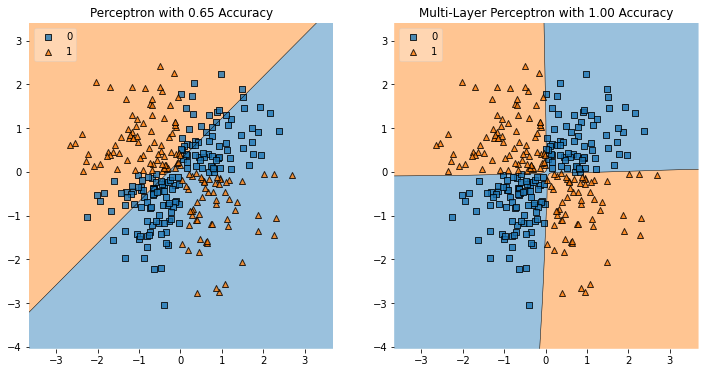

In [ ]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In model1 the data can only be split into on one category or the other by one calculation. There is no single linear separation of the data that can possibly contain only the correct labels. the model does its best to get the least amount of loss (the fewest errors) but a single sigmoid function cannot classify the data at a higher rate given this dataset.

With multiple layers, the second model does a perfect job of determining wich class the data should fall into. 

If (x < 0 AND y < 0) OR (x > 0 AND y > 0), the point usually fits into category 0. 

If (x < 0 AND y > 0) OR (x > 0 AND y < 0), the point usually fits into category 1. 

Non-linear separation would be useful in image recognition with even more layers because the color, saturation, position, and relational postion of each pixel could all determine wether a colection of pixels represents a certain type of image or not. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [ ]:
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0


In [ ]:
#Splitting the data
X = df[df.columns.drop('target')]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,
    stratify= y,
    random_state=17)

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3


In [ ]:
y.head()

19     1
126    1
17     1
254    0
251    0
Name: target, dtype: int64

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [ ]:
#scaling the data
scaler = StandardScaler()
X_train_fit = scaler.fit_transform(X_train)
X_test_fit = scaler.fit_transform(X_test)

In [ ]:
X_test_fit[:5]

array([[-1.46693688,  0.54577682,  1.7631813 , -0.73567087, -0.14419176,
        -0.29880715,  0.95197164,  1.35723445,  1.67705098,  2.46894231,
        -0.75349652, -0.60662331,  1.05045146],
       [-0.0110158 , -1.83225076,  0.86689747, -0.73567087,  1.22213018,
        -0.29880715, -1.05045146,  0.23964129, -0.59628479, -0.32166301,
         0.94884747, -0.60662331, -0.55148702],
       [ 0.77294171,  0.54577682, -0.92567018, -1.95182056, -0.08014542,
        -0.29880715,  0.95197164,  0.19493756, -0.59628479, -0.75769509,
         0.94884747,  0.36716674,  1.05045146],
       [ 0.88493564,  0.54577682,  1.7631813 ,  2.30470334,  1.07268872,
        -0.29880715, -1.05045146,  0.32904874, -0.59628479, -0.67048868,
        -0.75349652, -0.60662331,  1.05045146],
       [-1.9149126 ,  0.54577682,  1.7631813 , -0.85728584, -1.190282  ,
        -0.29880715, -1.05045146,  0.99960464, -0.59628479, -0.84490151,
         0.94884747, -0.60662331, -0.55148702]])

In [ ]:
#create the model
tf.random.set_seed(17)
logdir = os.path.join("logs", "EarlyStopping-Loss")

stop = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)


model = tf.keras.Sequential([
    Dense(128, activation='relu', input_dim= 13),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_89 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_90 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#baseline fit
model.fit(X_train_fit, y_train, epochs=72, 
          validation_data=(X_test_fit,y_test),
          callbacks=[myCallback(), stop])

Epoch 1/72
8/8 [==============================] - 0s 16ms/step - loss: 0.6477 - accuracy: 0.6653 - val_loss: 0.5957 - val_accuracy: 0.8197
Epoch 2/72
8/8 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.8140 - val_loss: 0.5077 - val_accuracy: 0.8197
Epoch 3/72
8/8 [==============================] - 0s 4ms/step - loss: 0.4378 - accuracy: 0.8388 - val_loss: 0.4375 - val_accuracy: 0.8033
Epoch 4/72
8/8 [==============================] - 0s 5ms/step - loss: 0.3752 - accuracy: 0.8554 - val_loss: 0.4044 - val_accuracy: 0.8197
Epoch 5/72
8/8 [==============================] - 0s 5ms/step - loss: 0.3238 - accuracy: 0.8636 - val_loss: 0.3955 - val_accuracy: 0.8033
Epoch 6/72
8/8 [==============================] - 0s 4ms/step - loss: 0.2996 - accuracy: 0.8802 - val_loss: 0.4030 - val_accuracy: 0.8197
Epoch 7/72
8/8 [==============================] - 0s 4ms/step - loss: 0.2785 - accuracy: 0.8967 - val_loss: 0.4132 - val_accuracy: 0.8033
Epoch 8/72
8/8 [=================

In [ ]:
model.evaluate(X_train_fit, y_train)

8/8 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9050


[0.22221839427947998, 0.9049586653709412]

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(units=16):
    # create model
    model = tf.keras.Sequential()
    model.add(Dense(units, input_dim=13, activation='relu'))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model_g = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
param_grid = {'batch_size': [32],
              'epochs': [20],
              'units':[32, 64, 128]}

In [ ]:
grid = GridSearchCV(estimator=model_g, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train_fit, y_train)

Epoch 1/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.5544
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.5907
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6425
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5936 - accuracy: 0.7306
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7876
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5537 - accuracy: 0.7824
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7824
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7824
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7979
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8083
Epoch 11/20
7/7 [======================

In [ ]:
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8675170063972473 using {'batch_size': 32, 'epochs': 20, 'units': 64}
Means: 0.8344387769699096, Stdev: 0.04808415854881698 with: {'batch_size': 32, 'epochs': 20, 'units': 32}
Means: 0.8675170063972473, Stdev: 0.0554814315600159 with: {'batch_size': 32, 'epochs': 20, 'units': 64}
Means: 0.8388605356216431, Stdev: 0.04785157017449535 with: {'batch_size': 32, 'epochs': 20, 'units': 128}
